In [1]:
import pandas as pd
import numpy as np
import re               # For regular expressions
import string           # For string operations
import numpy as np      # For numerical operations
import pandas as pd     # For data handling

In [2]:
df= pd.read_csv('/kaggle/input/tweets/tweet_data.csv')

In [3]:
df.head(10)

,target,id,date,user,text
0,1,2184554517,Mon Jun 15 16:04:49 PDT 2009,KaylaMKennedy,I Have Something Good In My Life And Just Want...
1,1,2190235860,Tue Jun 16 02:09:10 PDT 2009,heidischall,Back online
2,1,2186625882,Mon Jun 15 19:06:18 PDT 2009,steveken,@NathanFillion What about apartment building m...
3,1,1972918422,Sat May 30 10:07:54 PDT 2009,duckydynamo,"@Coombsy1989 they announced fable 3... sorta,"
4,0,2201410519,Tue Jun 16 20:14:13 PDT 2009,Isa_483,"@iamizzap i know, i feel bad for the leak too...."
5,1,2017486151,Wed Jun 03 08:28:10 PDT 2009,JazzPaige,on our way to kean!! w00t
6,1,1827837421,Sun May 17 11:33:03 PDT 2009,juliananizm,"@HaidaFauzi wah, topaz ring - in blue? said to..."
7,1,1969253795,Fri May 29 23:28:07 PDT 2009,MiSSJiLLYBEAN06,"Costco, the Getty, THREE HOURS of traffic, tac..."
8,0,2253267496,Sat Jun 20 07:52:48 PDT 2009,OnlyQ,@toddzelin What's wrong with her? She going t...
9,1,2185100217,Mon Jun 15 16:53:11 PDT 2009,Kriss_O,@babygirlparis Have fun! Have u seen yourself ...


In [4]:
df2=df.drop(['id', 'date', 'user'], axis=1)


In [5]:
df2.head()

,target,text
0,1,I Have Something Good In My Life And Just Want...
1,1,Back online
2,1,@NathanFillion What about apartment building m...
3,1,"@Coombsy1989 they announced fable 3... sorta,"
4,0,"@iamizzap i know, i feel bad for the leak too...."


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   target  240000 non-null  int64 
 1   text    240000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [7]:
df2.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
df2['target'].value_counts()

target
1    120000
0    120000
Name: count, dtype: int64

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


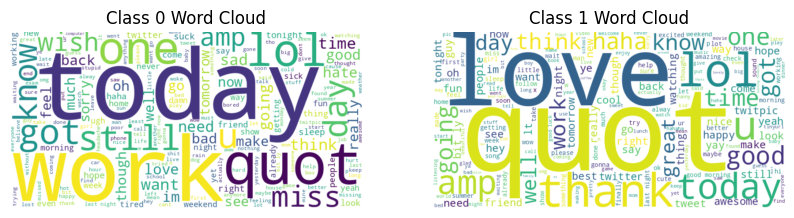

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords (run this once)
nltk.download('stopwords')



# Filter text by class
text_class_0 = df2[df2['target'] == 0]['text']
text_class_1 = df2[df2['target'] == 1]['text']

# Combine all texts into a single string for each class
text_class_0 = ' '.join(text_class_0)
text_class_1 = ' '.join(text_class_1)

# Define stopwords and negation words
stop_words = set(stopwords.words('english'))
negation_words = {'not', 'no', 'never', 'none', 'nothing', 'nobody', 'neither', 'nor', 'cannot', 'isn\'t', 'wasn\'t', 'don\'t', 'doesn\'t'}

# Function to preprocess text (keep negation words, remove other stopwords)
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words or word in negation_words])  # Keep negations
    return text

# Preprocess the texts
text_class_0 = preprocess_text(text_class_0)
text_class_1 = preprocess_text(text_class_1)

# Generate word clouds for each class
wordcloud_0 = WordCloud(width=800, height=400, background_color='white').generate(text_class_0)
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(text_class_1)

# Plot the word clouds
plt.figure(figsize=(10, 5))

# Plot for class 0
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis('off')
plt.title('Class 0 Word Cloud')

# Plot for class 1
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis('off')
plt.title('Class 1 Word Cloud')

plt.show()


In [12]:
def clean_tweet(text):
    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags (#word)
    text = re.sub(r'#\w+', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove emojis (if you decide to)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    return text

# Example of applying this to your dataset
df2['cleaned_text'] = df2['text'].apply(clean_tweet)


In [13]:
df2.head()


,target,text,cleaned_text
0,1,I Have Something Good In My Life And Just Want...,i have something good in my life and just want...
1,1,Back online,back online
2,1,@NathanFillion What about apartment building m...,what about apartment building maintenance guys...
3,1,"@Coombsy1989 they announced fable 3... sorta,",they announced fable sorta
4,0,"@iamizzap i know, i feel bad for the leak too....",i know i feel bad for the leak too i cant wait...


In [16]:
df2.drop(['text'], axis=1, inplace=True)

In [17]:
df2.head()

,target,cleaned_text
0,1,i have something good in my life and just want...
1,1,back online
2,1,what about apartment building maintenance guys...
3,1,they announced fable sorta
4,0,i know i feel bad for the leak too i cant wait...


In [18]:
# Check how many empty tweets there are (after cleaning)
empty_tweets = df2[df2['cleaned_text'].str.strip() == '']

# Print the number of empty tweets
print(f"Number of empty tweets: {empty_tweets.shape[0]}")

# Drop the empty rows from the DataFrame
df2 = df2[df2['cleaned_text'].str.strip() != '']

# Verify if the empty rows have been removed
print(f"New DataFrame shape: {df2.shape}")


Number of empty tweets: 589
New DataFrame shape: (239411, 2)


In [19]:
import nltk
from nltk.tokenize import word_tokenize

# Ensure necessary resources are downloaded (run this once)
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# Tokenize the cleaned text (no need for additional stopword removal)
df2['tokens'] = df2['cleaned_text'].apply(lambda x: word_tokenize(x))

# View the tokenized text for the first few rows
print(df2[['cleaned_text', 'tokens']].head())


                                        cleaned_text  \
0  i have something good in my life and just want...   
1                                        back online   
2  what about apartment building maintenance guys...   
3                         they announced fable sorta   
4  i know i feel bad for the leak too i cant wait...   

                                              tokens  
0  [i, have, something, good, in, my, life, and, ...  
1                                     [back, online]  
2  [what, about, apartment, building, maintenance...  
3                    [they, announced, fable, sorta]  
4  [i, know, i, feel, bad, for, the, leak, too, i...  


In [22]:
df2.head()

,target,cleaned_text,tokens
0,1,i have something good in my life and just want...,"[i, have, something, good, in, my, life, and, ..."
1,1,back online,"[back, online]"
2,1,what about apartment building maintenance guys...,"[what, about, apartment, building, maintenance..."
3,1,they announced fable sorta,"[they, announced, fable, sorta]"
4,0,i know i feel bad for the leak too i cant wait...,"[i, know, i, feel, bad, for, the, leak, too, i..."


In [24]:
df3=df2[['target','tokens']]

In [25]:
df3.head()

,target,tokens
0,1,"[i, have, something, good, in, my, life, and, ..."
1,1,"[back, online]"
2,1,"[what, about, apartment, building, maintenance..."
3,1,"[they, announced, fable, sorta]"
4,0,"[i, know, i, feel, bad, for, the, leak, too, i..."


In [26]:
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

# Apply stemming to each token in the 'tokens' column
df3['stemmed_tokens'] = df3['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

# View the results
print(df3[['tokens', 'stemmed_tokens']].head())
df3.drop(['tokens'], axis=1,inplace=True)

                                              tokens  \
0  [i, have, something, good, in, my, life, and, ...   
1                                     [back, online]   
2  [what, about, apartment, building, maintenance...   
3                    [they, announced, fable, sorta]   
4  [i, know, i, feel, bad, for, the, leak, too, i...   

                                      stemmed_tokens  
0  [i, have, someth, good, in, my, life, and, jus...  
1                                      [back, onlin]  
2  [what, about, apart, build, mainten, guy, or, ...  
3                       [they, announc, fabl, sorta]  
4  [i, know, i, feel, bad, for, the, leak, too, i...  


In [27]:
df3.head()

,target,stemmed_tokens
0,1,"[i, have, someth, good, in, my, life, and, jus..."
1,1,"[back, onlin]"
2,1,"[what, about, apart, build, mainten, guy, or, ..."
3,1,"[they, announc, fabl, sorta]"
4,0,"[i, know, i, feel, bad, for, the, leak, too, i..."


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine tokens back to string for vectorization
df3['token_str'] = df3['stemmed_tokens'].apply(lambda x: ' '.join(x))

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features

# Fit and transform the tokenized text data
X = vectorizer.fit_transform(df3['token_str'])

# Target variable
y = df3['target']


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Multinomial Naive Bayes model
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Accuracy: 0.7615228786834576
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.76     23925
           1       0.77      0.75      0.76     23958

    accuracy                           0.76     47883
   macro avg       0.76      0.76      0.76     47883
weighted avg       0.76      0.76      0.76     47883

Confusion Matrix:
[[18395  5530]
 [ 5889 18069]]
